In [1]:
# Most important 10 locations has been highlighted for Piazza Mazini Square in Rome.
# Here, Katz Centrality Metric Has been used.

In [2]:
import numpy as np
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt

In [3]:
#load adjancecy matrix
aa=scipy.io.loadmat('adj.mat')

In [4]:
mat=aa['A']

In [5]:
# convert adjancency matrix to graph
G=nx.from_numpy_matrix(mat)

Largest eigenvalue: 1.9811033012164607
Smallest eigenvalue: 3.4867941867133823e-16


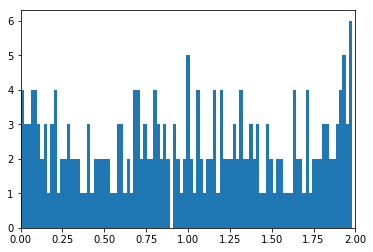

In [6]:
# lets plot all eigenvalues of A
L = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(L.A)
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()

/usr/local/lib/python3.7/site-packages/networkx/algorithms/centrality/katz.py:186: ComplexWarning: Casting complex values to real discards the imaginary part
  s = 1.0 / sqrt(sum(v**2 for v in x.values()))


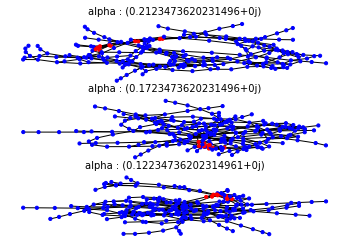

In [7]:
fig = plt.figure(1); plt.clf()
fig, ax = plt.subplots(3, 1, num=1,figsize=(30,20))


for i,x in enumerate([0.01,0.05,0.1]):
    plt.sca(ax[i])
    phi=max(nx.adjacency_spectrum(G))
    centrality = nx.katz_centrality(G, 1 / phi - x)
    sortedlist = sorted(centrality.items(),key=lambda x:x[1],reverse=True)
    idx=[k[0] for k in sortedlist[:10]]
    color=[[0,0,1]]*mat.shape[0]
    for el in idx:
        color[el]=[1,0,0]
    nx.draw(G, pos=nx.spring_layout(G),node_size=10,node_color=color, ax=ax[i])
    ax[i].set_title('alpha : ' + str(1 / phi - x).format('.2f'), fontsize=10)
    
fig.savefig('katz_centrality.png', dpi=1000)